In [1]:
!pip install mlflow seaborn scikit-learn catboost

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached catboost-1.2.8-cp313-cp313-win_amd64.whl.metadata (1.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached markupsafe-3.0.3-cp313-cp313-win_amd64.whl.metadata (2.8 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached anyio-4.11.0-py3-none-any.whl.metadata (4.1 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/8.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.8 MB 4.4 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.8 MB 3.9 


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## MLFlow

In [2]:
import mlflow

import mlflow
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from mlflow.models import infer_signature

In [ ]:
# mlflow server --host 127.0.0.1 --port 9090

^C


In [3]:
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

### Классификация

In [4]:
experiment = mlflow.create_experiment(name="breast_cancer", artifact_location='my-artifacts')

MlflowException: API request to http://127.0.0.1:8080/api/2.0/mlflow/experiments/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8080): Max retries exceeded with url: /api/2.0/mlflow/experiments/create (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000211BE699AE0>: Failed to establish a new connection: [WinError 10061] Подключение не установлено, т.к. конечный компьютер отверг запрос на подключение'))

In [9]:
mlflow.sklearn.autolog(log_post_training_metrics=True)

# Load data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.2, random_state=42
)


with mlflow.start_run(experiment_id=experiment, run_name='Breast cancer GBC'):
    
    model = GradientBoostingClassifier(n_estimators=10, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print(f"Accuracy: {accuracy:.3f}")
    print(f"AUC Score: {auc_score:.3f}")

Accuracy: 0.956
AUC Score: 0.967
🏃 View run Breast cancer GBC at: http://127.0.0.1:8080/#/experiments/347432959814225098/runs/3c8fe2790ef54e61a0ad173fa336babd
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/347432959814225098


In [ ]:
# mlruns/
# ├── 0/                                    # Experiment ID
# │   ├── bc6dc2a4f38d47b4b0c99d154bbc77ad/ # Run ID
# │   │   ├── metrics/
# │   │   │   └── mse                       # Example metric file for mean squared error
# │   │   ├── artifacts/                    # Artifacts associated with our run
# │   │   │   └── sklearn-model/
# │   │   │       ├── python_env.yaml
# │   │   │       ├── requirements.txt      # Python package requirements
# │   │   │       ├── MLmodel               # MLflow model file with model metadata
# │   │   │       ├── model.pkl             # Serialized model file
# │   │   │       ├── input_example.json
# │   │   │       └── conda.yaml
# │   │   ├── tags/
# │   │   │   ├── mlflow.user
# │   │   │   ├── mlflow.source.git.commit
# │   │   │   ├── mlflow.runName
# │   │   │   ├── mlflow.source.name
# │   │   │   ├── mlflow.log-model.history
# │   │   │   └── mlflow.source.type
# │   │   ├── params/
# │   │   │   ├── max_depth
# │   │   │   └── random_state
# │   │   └── meta.yaml
# │   └── meta.yaml
# ├── models/                               # Model Registry Directory
#     ├── sk-learn-random-forest-reg-model/ # Registered model name
#     │   ├── version-1/                    # Model version directory
#     │   │   └── meta.yaml
#     │   └── meta.yaml

### Ручное логгирование

In [ ]:
# experiment = mlflow.create_experiment(name="Some Classification", artifact_location='my-artifacts')
experiment = mlflow.get_experiment_by_name(name="Some Classification")
experiment.experiment_id

In [41]:
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from mlflow.models import infer_signature

X, y = make_classification(n_samples=100, n_features=5, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

with mlflow.start_run(experiment_id=experiment.experiment_id, run_name='Cls'):
    params = {"C": 0.5, "max_iter": 20, "solver": "lbfgs", "random_state": 42}
    mlflow.log_params(params)

    model = LogisticRegression(**params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average="weighted"),
        "recall": recall_score(y_test, y_pred, average="weighted"),
        "f1_score": f1_score(y_test, y_pred, average="weighted"),
    }
    mlflow.log_metrics(metrics)
    signature = infer_signature(X_train, model.predict(X_train))

    mlflow.sklearn.log_model(
        sk_model=model,
        name="model",
        signature=signature,
        input_example=X_train[:5],
        registered_model_name="sk-learn-logistic-regression-model",
    )

Successfully registered model 'sk-learn-logistic-regression-model'.
2025/10/01 17:35:49 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-logistic-regression-model, version 1
Created version '1' of model 'sk-learn-logistic-regression-model'.


🏃 View run Cls at: http://127.0.0.1:8080/#/experiments/327313628699113092/runs/21d1205787eb4439a218422473d6f650
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/327313628699113092


### Загрузка зарегистрированной модели

In [42]:
import mlflow.sklearn
from sklearn.datasets import make_regression

model_name = "sk-learn-logistic-regression-model"
model_version = "latest"

# Load the model from the Model Registry
model_uri = f"models:/{model_name}/{model_version}"
model = mlflow.sklearn.load_model(model_uri)

# Generate a new dataset for prediction and predict
X, y = make_classification(n_samples=100, n_features=5, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
y_pred = model.predict(X_test)

print(y_pred)

[0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1]


### Подбор гиперпараметров

In [ ]:
import mlflow
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

mlflow.sklearn.autolog(max_tuning_runs=10)

# Load data
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, random_state=42
)

# Define parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# experiment = mlflow.create_experiment(name="RFHT", artifact_location='my-artifacts/hp_tune')
with mlflow.start_run(experiment_id=experiment, run_name="rfhp tuning", nested=True):
    # Create and fit GridSearchCV
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(
        rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1
    )

    grid_search.fit(X_train, y_train)

    # Best model evaluation
    best_score = grid_search.score(X_test, y_test)
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.3f}")
    print(f"Test score: {best_score:.3f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits


2025/10/01 16:24:01 INFO mlflow.sklearn.utils: Logging the 10 best runs, 98 runs will be omitted.


Best parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.975
Test score: 0.981
🏃 View run Random Forest Hyperparameter Tuning at: http://127.0.0.1:8080/#/experiments/474353849119002971/runs/96a27018b562461399eaa7e0241c5193
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/474353849119002971


### Артефакты

In [56]:
experiment = mlflow.get_experiment_by_name(name="Some Classification")
runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])
runs

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.training_f1_score,metrics.accuracy_score_X_test,metrics.f1_score_X_test,metrics.precision_score_X_test,...,params.warm_start,params.penalty,params.C,params.max_iter,tags.estimator_name,tags.mlflow.source.name,tags.estimator_class,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.runName
0,21d1205787eb4439a218422473d6f650,327313628699113092,FINISHED,file:///d:/KITT/MIIT/4. Experiment control/my-...,2025-10-01 14:35:38.608000+00:00,2025-10-01 14:35:49.956000+00:00,0.987486,1.0,1.0,1.0,...,False,l2,0.5,20,LogisticRegression,d:\KITT\MIIT\4. Experiment control\.venv\Lib\s...,sklearn.linear_model._logistic.LogisticRegression,junk3,LOCAL,Cls
1,c780f4249aaa45d5a1bc6e28f83ca894,327313628699113092,FINISHED,file:///d:/KITT/MIIT/4. Experiment control/my-...,2025-10-01 13:06:21.117000+00:00,2025-10-01 13:06:50.781000+00:00,0.987486,1.0,1.0,1.0,...,False,l2,0.5,20,LogisticRegression,d:\KITT\MIIT\4. Experiment control\.venv\Lib\s...,sklearn.linear_model._logistic.LogisticRegression,junk3,LOCAL,Breast cancer GBC
2,d43a305be84e4c30802c03e5169386d7,327313628699113092,FINISHED,file:///d:/KITT/MIIT/4. Experiment control/my-...,2025-10-01 13:05:19.077000+00:00,2025-10-01 13:05:29.681000+00:00,1.000000,1.0,1.0,1.0,...,False,l2,1.0,10,LogisticRegression,d:\KITT\MIIT\4. Experiment control\.venv\Lib\s...,sklearn.linear_model._logistic.LogisticRegression,junk3,LOCAL,Breast cancer GBC


In [57]:
run_id = runs['run_id'].iloc[0]
run_id

'21d1205787eb4439a218422473d6f650'

In [59]:
mlflow.artifacts.download_artifacts(
    run_id=run_id,
    artifact_path='model',
    dst_path='downloaded_artifacts/cls'
)

'd:\\KITT\\MIIT\\4. Experiment control\\downloaded_artifacts\\cls\\model\\'

In [ ]:
model_1 = mlflow.sklearn.load_model('downloaded_artifacts/cls/model')

In [61]:
X, y = make_classification(n_samples=100, n_features=5, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

y_pred = model.predict(X_test)
print(y_pred)

[0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1]


## ClearML

In [5]:
import os

import pandas as pd
import numpy as np
from clearml import Task, OutputModel
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ParameterSampler
from catboost import CatBoostClassifier, Pool

# https://www.kaggle.com/datasets/emrullahdemirhan/titaniccsv?resource=download

In [6]:
%env CLEARML_WEB_HOST=https://app.clear.ml/
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=PHF53G1Z9HBSTYF9TAKYEICPMVY3PR
%env CLEARML_API_SECRET_KEY=KqiyMjpsIi1felOaQ_tN8LoG18hgWr0jNz9Y_pdwhNBlgQY7Q0PVfxL7BsdHBrgQAoo

env: CLEARML_WEB_HOST=https://app.clear.ml/
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=PHF53G1Z9HBSTYF9TAKYEICPMVY3PR
env: CLEARML_API_SECRET_KEY=KqiyMjpsIi1felOaQ_tN8LoG18hgWr0jNz9Y_pdwhNBlgQY7Q0PVfxL7BsdHBrgQAoo


In [7]:
task = Task.init(
    project_name='ClearML_Test', 
    task_name='Cat1', 
    tags=['CatBoost','RandomSearch'])

ClearML Task: created new task id=554adc16c3534aa3840fa01828784092
2025-11-06 22:12:46,014 - clearml.Task - INFO - No repository found, storing script code instead
ClearML results page: https://app.clear.ml/projects/210e773c8cb741d5b2bed61fe49ce3a9/experiments/554adc16c3534aa3840fa01828784092/output/log


In [8]:
prev_task = Task.get_task(project_name='ClearML_Test', task_name='Cat1')

In [9]:
fpath = 'titanic.csv'
df_raw = pd.read_csv(fpath)
task.upload_artifact(name='data.raw', artifact_object=df_raw)

True

In [10]:
task.upload_artifact(
    name='eda.describe.object', 
    artifact_object=df_raw.describe(include=object))
task.upload_artifact(
    name='eda.describe.number', 
    artifact_object=df_raw.describe(include=np.number))

True

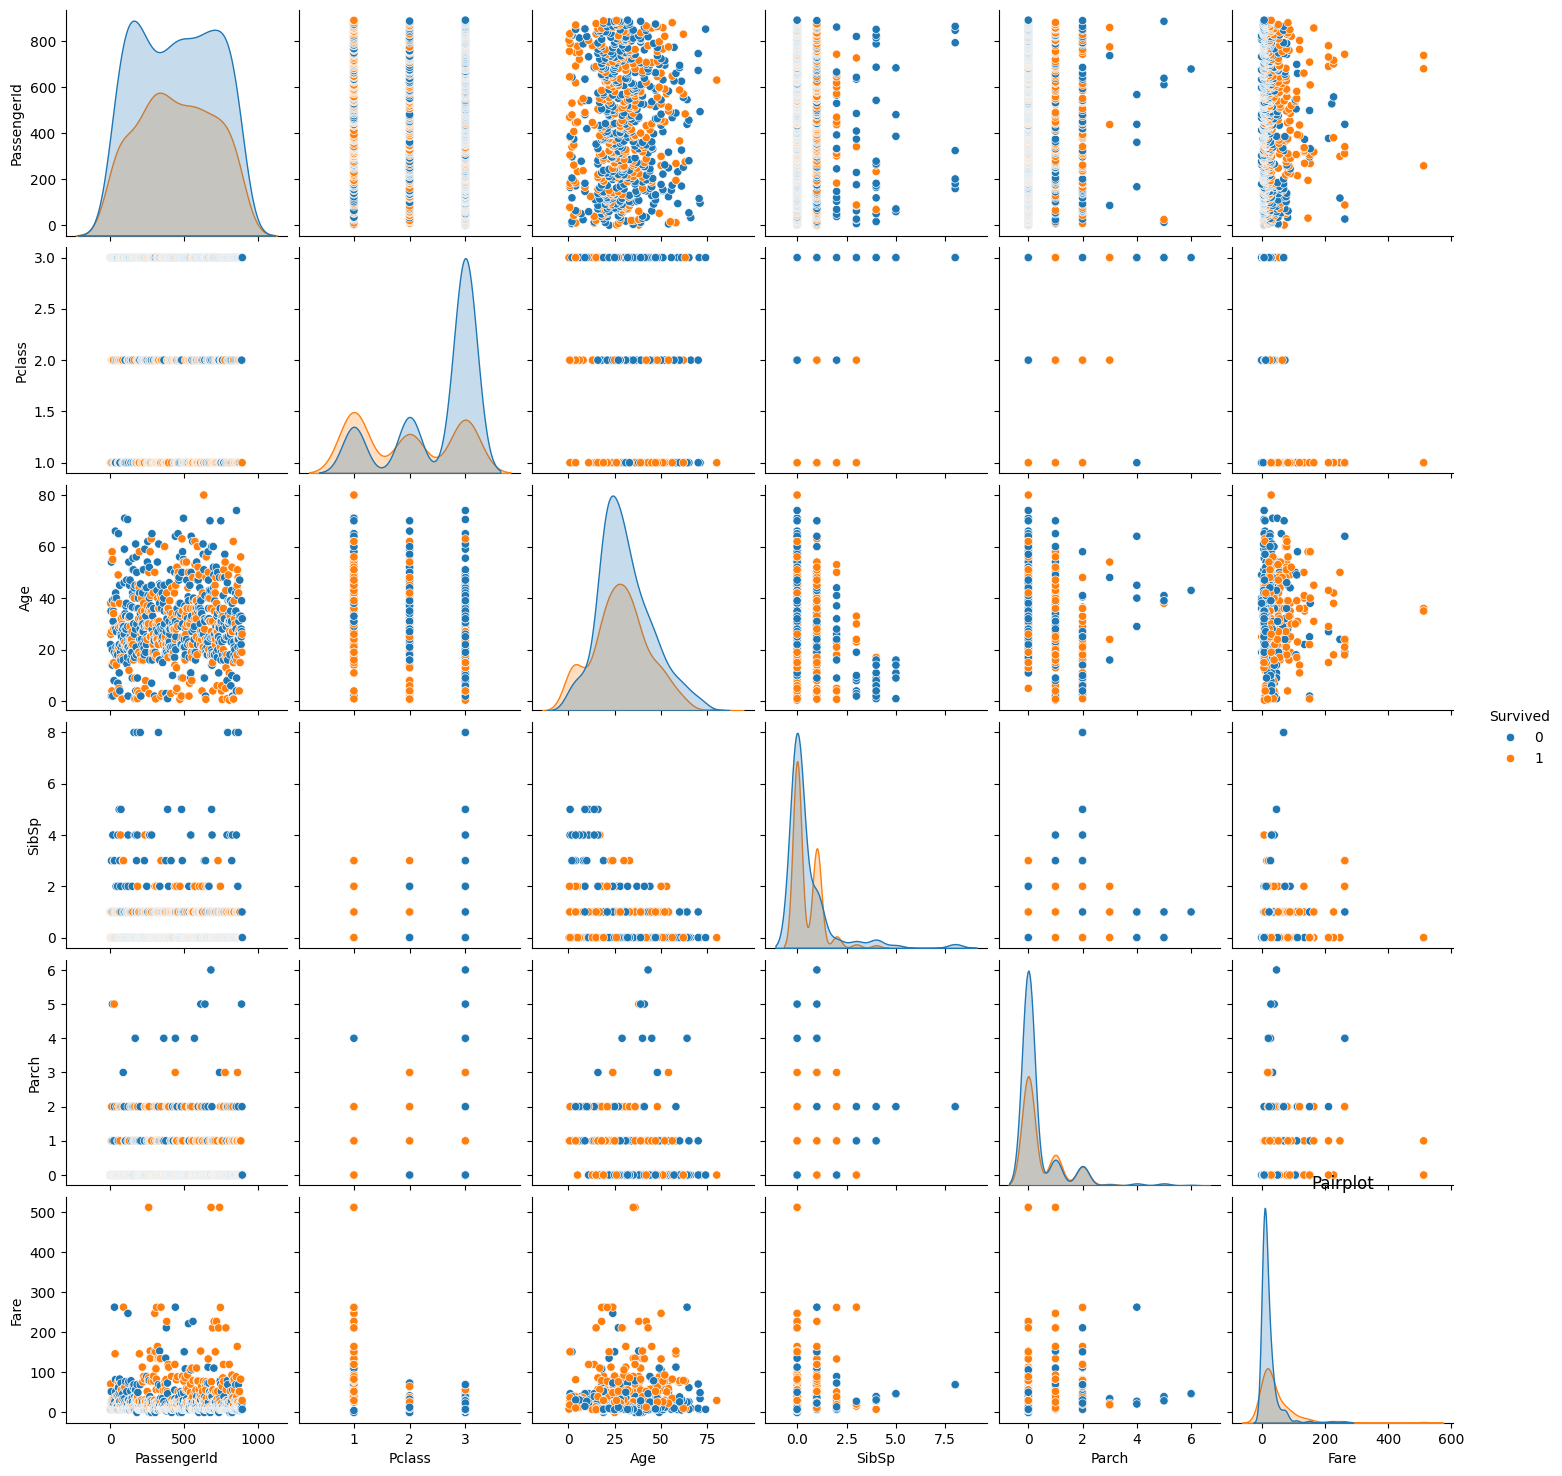

In [11]:
sns.pairplot(df_raw, hue='Survived')
plt.title('Pairplot')
plt.show()

In [12]:
df_preproc = df_raw.drop(columns=['PassengerId','Name','Ticket'])
for col in ['Sex','Cabin','Embarked']:
    df_preproc[col] = df_preproc[col].astype(str)
task.upload_artifact(name='data.preproc', artifact_object=df_preproc)

train, test = train_test_split(df_preproc, test_size=0.33, random_state=42)
task.upload_artifact(name='data.train', artifact_object=train)
task.upload_artifact(name='data.test', artifact_object=test)

True

In [13]:
X_train = train.drop(columns=['Survived'])
y_train = train['Survived']

model = CatBoostClassifier(silent=True)
model.fit(X_train, y_train, cat_features=['Sex','Cabin','Embarked'])
model.save_model('catboost_best.cbm')

In [14]:
output_model=OutputModel(task=task, framework='catboost', name='catboost_previous')
output_model.update_weights(weights_filename='catboost_best.cbm')
output_model.publish()
print('Registered model id:',output_model.id)

2025-11-06 22:15:00,773 - clearml.model - INFO - No output storage destination defined, registering local model catboost_best.cbm
Registered model id: 55ade9a0f442437898c4d99a2e927da2


In [15]:
task.close()

In [16]:
# Catboost

param_grid = {
    'depth': [4,5,6,7,8],
    'learning_rate': [0.1,0.05,0.01,0.005,0.001],
    'iterations': [30,50,100,150]
}

fpath = 'titanic.csv'
df_raw = pd.read_csv(fpath)

df_preproc = df_raw.drop(columns=['PassengerId','Name','Ticket'])
for col in ['Sex','Cabin','Embarked']:
    df_preproc[col] = df_preproc[col].astype(str)

X = df_preproc.drop(columns='Survived')
y = df_preproc['Survived']

X_remain, X_test, y_remain, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_remain, y_remain, test_size=0.25, random_state=42, stratify=y_remain)

train_pool = Pool(X_train, y_train, cat_features=['Sex','Cabin','Embarked'])
val_pool = Pool(X_val, y_val, cat_features=['Sex','Cabin','Embarked'])
test_pool = Pool(X_test, y_test, cat_features=['Sex','Cabin','Embarked'])


# ClearML
parent_task = Task.init(
    project_name='Titanic_HPO',
    task_name='CatBoost',
    tags=['CatBoost','RandomSearch', 'Titanic', 'parent_task'],
    auto_connect_frameworks={'catboost':False}
)

parent_logger=parent_task.get_logger()

ClearML Task: created new task id=65d9e9af58d14c69b3f16f69a7972dbe
ClearML results page: https://app.clear.ml/projects/f228ce29b2014bd08198f7db2e8c5001/experiments/65d9e9af58d14c69b3f16f69a7972dbe/output/log


In [17]:
best_score = -1
best_model = None
best_params = None

for i, param in enumerate(ParameterSampler(param_grid, n_iter=3, random_state=42), start=1):
    # ClearML
    task = Task.create(
        project_name='Titanic_HPO',
        task_name=f'Run {i:03d}',
        task_type=Task.TaskTypes.training
    )
    task.mark_started()
    task.set_parent(parent_task)
    
    task.set_tags([f'{k}={v}' for k,v in param.items()] + ['hpo', parent_task.id])
    task.connect(param)
    logger = task.get_logger()

    model = CatBoostClassifier(**param, silent=True, random_state=42, loss_function='Logloss', eval_metric='AUC')
    model.fit(X_train, y_train, cat_features=['Sex','Cabin','Embarked'], eval_set=val_pool, use_best_model=False)

    train_scores = model.eval_metrics(train_pool, metrics=['Logloss','AUC'])
    val_scores = model.eval_metrics(val_pool, metrics=['Logloss','AUC'])

    # train_logloss = round(train_scores['Logloss'][-1],6)
    # train_auc = round(train_scores['AUC'][-1],6)
    # val_logloss = round(val_scores['Logloss'][-1],6)
    # val_auc = round(val_scores['AUC'][-1],6)

    # parent_logger.report_scalar('Logloss', f'Train_run{i}',iteration=i,value=train_logloss)
    # parent_logger.report_scalar('Logloss', f'Val_run{i}',iteration=i,value=val_logloss)
    # parent_logger.report_scalar('AUC', f'Train_run{i}',iteration=i,value=train_auc)
    # parent_logger.report_scalar('AUC', f'Val_run{i}',iteration=i,value=val_auc)
    
    train_logloss = train_scores['Logloss']
    val_logloss = val_scores['Logloss']
    train_auc = train_scores['AUC']
    val_auc = val_scores['AUC']

    # ClearML
    for it, v in enumerate(train_logloss, start=1):
        logger.report_scalar('Logloss', 'Train', iteration=it, value=v)
        parent_logger.report_scalar('Train_Logloss', f'Train_run{i}',iteration=it,value=v)
    for it, v in enumerate(val_logloss, start=1):
        logger.report_scalar('Logloss', 'Val', iteration=it, value=v)
        parent_logger.report_scalar('Val_Logloss', f'Val_run{i}',iteration=it,value=v)
    for it, v in enumerate(train_auc, start=1):
        logger.report_scalar('AUC', 'Train', iteration=it, value=v)
        parent_logger.report_scalar('Train_AUC', f'Train_run{i}',iteration=it,value=v)
    for it, v in enumerate(val_auc, start=1):
        logger.report_scalar('AUC', 'Val', iteration=it, value=v)
        parent_logger.report_scalar('Val_AUC', f'Val_run{i}',iteration=it,value=v)

    score = round(val_auc[-1], 6)
    if score > best_score:
        best_score = score
        best_model = model
        best_params = param

    task.mark_completed()
    task.close()

if best_model is not None:
    test_scores = best_model.eval_metrics(test_pool, metrics=['Logloss','AUC'])
    test_logloss = round(test_scores['Logloss'][-1],6)
    test_auc = round(test_scores['AUC'][-1],6)
    print(f'Best params: {best_params}')
    print(f'Test logloss: {test_logloss}, Test AUC: {test_auc:.4f}')
    os.makedirs('artifacts', exist_ok=True)
    model_path = os.path.join('artifacts','catboost_best.cbm')
    best_model.save_model(model_path)
    parent_task.upload_artifact('catboost_best', artifact_object=model_path)
    parent_task.connect(best_params, name='best_params')
    parent_logger.report_single_value('Best Val AUC', best_score)
    parent_logger.report_single_value('Test AUC', test_auc)


Best params: {'learning_rate': 0.005, 'iterations': 100, 'depth': 6}
Test logloss: 0.583243, Test AUC: 0.8293


In [18]:
output_model = OutputModel(task=parent_task, framework='catboost', name='catboost_previous')

In [19]:
output_model.update_weights(weights_filename=model_path)

In [20]:
output_model.update_design(config_dict=best_params)

In [21]:
labels = {'live': 0, 'dead': 1}
output_model.update_labels(labels)

In [22]:
output_model.set_metadata(key='version', value='1.2.3', v_type='str')
output_model.set_metadata(key='source', value='titanic', v_type='str')

True

In [23]:
output_model.publish()

In [24]:
parent_task.close()